In [68]:
import sys 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append("/cluster/home/terjenf/")

In [3]:
from NAPLab_car.tools.data_processing import utils, extract_camera_parameters

Hi NAPLAB __init__.py
Hi from tools __init__.py
Hi from data_processing __init__.py


In [4]:
data_path = "/cluster/home/terjenf/MapTR/NAP_raw_data"
trip ="Trip077"

In [5]:
absoulute_files = utils.get_folders(data_path)
absoulute_files

['/cluster/home/terjenf/MapTR/NAP_raw_data/Trip094',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip079',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip078',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/LidarTestDurga',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip092',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip089',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip093',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip085',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip088',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip081',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip095',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip087',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip076',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/sanket',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/shaira',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip080',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip090',
 '/cluster/home/terjenf/MapTR/NAP_raw_dat

In [6]:
files = utils.get_folder(data_path, folder_name=trip)
files

['/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C1_front60Single.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C1_front60Single.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C2_tricam60.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C2_tricam60.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C3_tricam120.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C3_tricam120.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C4_rearCam.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C4_rearCam.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C5_R1.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C5_R1.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C6_L1.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C6_L1.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C7_L2.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/T

In [8]:
json_files = utils.get_files(files, file_format="json")
json_files


['/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/camerasandCanandGnssCalibratedAll_lidars00-virtual.json',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/software_versions.json']

In [9]:
cams = [
        'C1_front60Single',
        'C8_R2',
        'C7_L2',
        'C4_rearCam',
        'C6_L1',
        'C5_R1',]

In [10]:
cam_parm = extract_camera_parameters.get_naplab_cams(json_files[0], cams)

In [11]:
cam_parm.keys()

dict_keys(['C1_front60Single', 'C4_rearCam', 'C5_R1', 'C6_L1', 'C7_L2', 'C8_R2'])

In [12]:
def make_image_coords(image_shape):
    """ 
    Generate mesh grid for plotting image plane
    """
 
    X, Y = np.meshgrid(np.arange(image_shape[0],), np.arange(image_shape[1]))

    x_coords = X.flatten()
    y_coords = Y.flatten()

    image_coords = np.stack((y_coords, x_coords))
    return image_coords, X, Y 

In [95]:
cam_parm

{'C1_front60Single': {'roll_pitch_yaw': [1.6242992877960205,
   2.82977557182312,
   2.152301788330078],
  't': [1.8162150382995605, 0.22106018662452698, 1.5156701803207397],
  'cx': 846.863159,
  'cy': 670.665466,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0,
   0.000536573003046215,
   1.28669519483537e-08,
   -1.43870852731265e-11,
   3.0433934028912e-15]},
 'C4_rearCam': {'roll_pitch_yaw': [1.358793020248413,
   4.126693248748779,
   178.9436798095703],
  't': [-0.4690086543560028, -0.0023030750453472137, 1.509656310081482],
  'cx': 962.005554,
  'cy': 643.866516,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0,
   0.00102833390701562,
   4.86667310894973e-08,
   -6.82437266419367e-12,
   3.32446777626203e-14]},
 'C5_R1': {'roll_pitch_yaw': [2.778383255004883,
   -1.005295991897583,
   -131.37277221679688],
  't': [1.933815360069275, -0.9714699983596802, 1.1585912704467773],
  'cx': 965.822693,
  'cy': 649.506042,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0

In [ ]:
def get_cam_props(cam_name, cam_param):
    w = cam_parm[cam_name]['width']
    h = cam_parm[cam_name]['height']
    cx = cam_parm[cam_name]['cx']
    cy = cam_parm[cam_name]['cy']
    float_bw = cam_parm[cam_name]['float_bw']
   
    return w, h, round(cx), round(cy), float_bw

In [110]:
w, h, cx, cy, float_bw = get_cam_props('C1_front60Single', cam_parm)

In [111]:
h

1208

In [112]:
image_coords, X, Y = make_image_coords([w,h])

In [113]:
image_coords.shape

(2, 2319360)

In [114]:
X.shape, X[0].shape, X[0]

((1208, 1920), (1920,), array([   0,    1,    2, ..., 1917, 1918, 1919]))

In [115]:
Y.shape, Y[0].shape, Y[0]

((1208, 1920), (1920,), array([0, 0, 0, ..., 0, 0, 0]))

In [116]:
image_coords[..., 0], image_coords[..., -1]

(array([0, 0]), array([1207, 1919]))

In [117]:
def shift_image(x_values, y_values, cx, cy):
    return (x_values - cx), (y_values - cy)

In [118]:
shifted_x, shifted_y = shift_image(X, Y, cx,cy)

In [119]:
X.shape, Y.shape

((1208, 1920), (1208, 1920))

In [120]:
def get_shifted_coordinate_from_grid(pixel_cord, shifted_x, shifted_y): 
    y_pixel = pixel_cord[0]
    x_pixel = pixel_cord[1]

    shifted_coord_y = shifted_y[y_pixel][0]
    shifted_coord_x = shifted_x[0][x_pixel]

    return shifted_coord_y, shifted_coord_x


def get_shifted_coordinate_from_pixels(x_pixel, y_pixel, shifted_x, shifted_y): 
    shifted_coord_y = shifted_y[y_pixel][0]

    shifted_coord_x = shifted_x[0][x_pixel]

    return shifted_coord_y, shifted_coord_x


def get_shifted_coordinate_from_pixel_y(y_pixel, shifted_y): 
    shifted_coord_y = shifted_y[y_pixel][0]

    return shifted_coord_y

def get_shifted_coordinate_from_pixel_x(x_pixel, shifted_x): 
    shifted_coord_x = shifted_x[0][x_pixel]
    
    return shifted_coord_x

In [121]:
cx

847

In [122]:
get_shifted_coordinate_from_pixels(x_pixel=int(cx), y_pixel=int(cy), shifted_y=shifted_y, shifted_x=shifted_x)

(np.int64(0), np.int64(0))

In [123]:
def plot_image_plane(shifted_x, shifted_y):
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(shifted_x, shifted_y, np.zeros_like(shifted_x),  alpha=0.5, cmap='viridis', edgecolor='k')

    ax.scatter(0,0,0, color='r')

    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), 0,0, color="b")
    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), get_shifted_coordinate_from_pixel_x(0, shifted_x),0, color="b")

    ax.plot((0,100), (0,0), (0,0), color="red")
    ax.plot((0,0), (0,100), (0,0), color="green")
    ax.plot((0,0), (0,0), (0,1), color="blue")


    ax.set_xlim(-1000, 1300)
    ax.set_ylim(-1000,1300 )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.view_init(elev=90, azim=90)

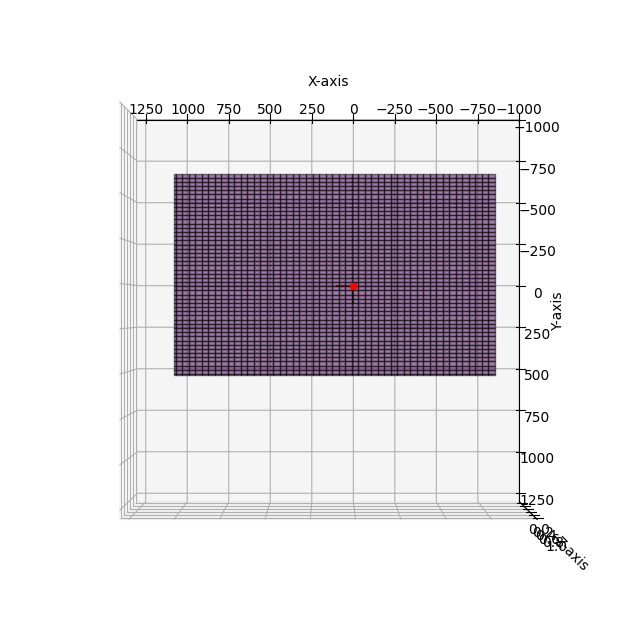

In [124]:
plot_image_plane(shifted_x, shifted_y)

In [125]:
cx, cy

(847, 671)

In [129]:
w, h, cx, cy, float_bw = get_cam_props('C1_front60Single', cam_parm)

In [ ]:
def calculate_rays(w, h, cx, cy, float_bw): 
    r_d = []
    rays = []
    for v in range(h):
        for u in range(w):
            ry = v - cy
            rx = u - cx

            r = np.sqrt(rx**2 + ry**2)
            theta = np.sum([j*r**i for i, j in enumerate(float_bw)])

            phi = np.arctan2(ry, rx)
            ray = [np.sin(theta)*np.cos(phi),
                    np.sin(theta)*np.sin(phi),
                      np.cos(theta)]
            
            r_d.append(r)
            rays.append(ray)

    return np.array(r_d), np.array(rays)
        

In [130]:
h

1208

In [131]:
r_d, rays = calculate_rays(w, h, cx, cy, float_bw)

In [152]:
def normalize_rays(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)

    # Avoid division by zero (set zero norms to 1 to prevent NaNs)
    norms[norms == 0] = 1

    # Normalize each vector
    normalized_vectors = vectors / norms

    return normalized_vectors

In [158]:
norm_rays = normalize_rays(rays)

In [178]:
norm_rays[19]

array([-0.42119558, -0.3413312 ,  0.84029001])

In [177]:
norm_rays.T[..., 19]

array([-0.42119558, -0.3413312 ,  0.84029001])

In [159]:
np.linalg.norm(norm_rays[0])

np.float64(1.0)

In [160]:
r_d.reshape(1208, 1920).shape

(1208, 1920)

In [161]:
def plot_r_distance(r_distance):
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(shifted_x, shifted_y, np.zeros_like(shifted_x),  alpha=0.5, cmap='viridis', edgecolor='k')
    ax.plot_surface(shifted_x, shifted_y, r_distance.reshape(1208, 1920))

    ax.scatter(0,0,0, color='r')

    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), 0,0, color="b")
    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), get_shifted_coordinate_from_pixel_x(0, shifted_x),0, color="b")


    ax.plot((0,100), (0,0), (0,0), color="red")
    ax.plot((0,0), (0,100), (0,0), color="green")
    ax.plot((0,0), (0,0), (0,1000), color="blue")


    ax.set_xlim(-1000, 1300)
    ax.set_ylim(-1000,1300 )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")


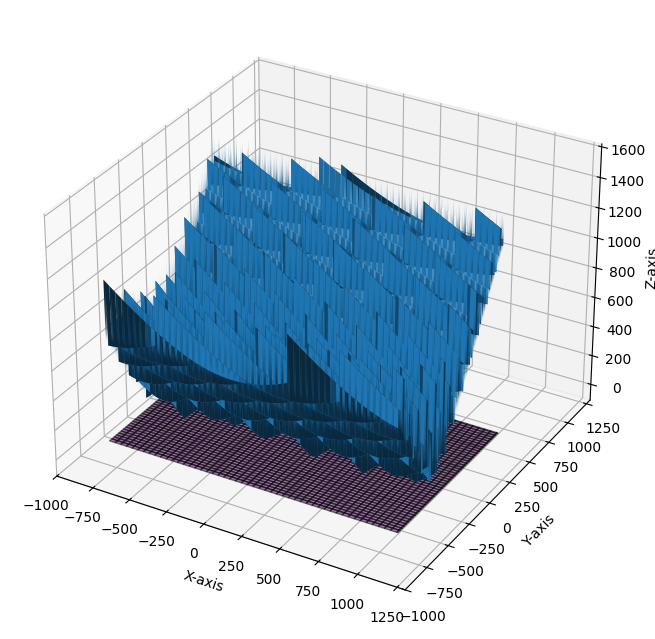

In [162]:
plot_r_distance(r_d)

In [163]:
x_steps = np.linspace(0, 1919, 5, dtype=int)
y_steps = np.linspace(0, 1207, 5, dtype=int)

In [165]:
selected_rays = norm_rays.reshape(1208, 1920, 3)[y_steps, :][:, x_steps] * 100
selected_start_points_x = shifted_x[y_steps, :][:, x_steps]
selected_start_points_y = shifted_y[y_steps, :][:, x_steps]

In [166]:
one_ray = rays.reshape(1208,1920, 3)
one_ray.shape

(1208, 1920, 3)

In [167]:
one_ray = rays.reshape(1208,1920, 3)[0,0, ...] * 100

In [168]:
shifted_x[0, 0], shifted_y[0,0]

(np.int64(-847), np.int64(-671))

In [169]:
def plot_rays_on_image():
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(shifted_x, shifted_y, np.zeros_like(shifted_x),  alpha=0.5, cmap='viridis', edgecolor='k')
    #ax.plot_surface(shifted_x, shifted_y, r_distance.reshape(1208, 1920))
    ax.quiver(
        selected_start_points_x, selected_start_points_y, np.zeros_like(selected_start_points_x), 
        selected_rays[..., 0], selected_rays[..., 1], selected_rays[..., 2]
    )

    ax.scatter(0,0,0, color='r')

    # ax.quiver(shifted_x[0, 0], shifted_y[0,0], 0, 
    #           one_ray[0], one_ray[1], one_ray[2]*10
    #           , color="black")

    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), 0,0, color="b")
    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), get_shifted_coordinate_from_pixel_x(0, shifted_x),0, color="b")


    ax.plot((0,100), (0,0), (0,0), color="red")
    ax.plot((0,0), (0,100), (0,0), color="green")
    ax.plot((0,0), (0,0), (0,1000), color="blue")


    ax.set_xlim(-1000, 1300)
    ax.set_ylim(-1000,1300 )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")




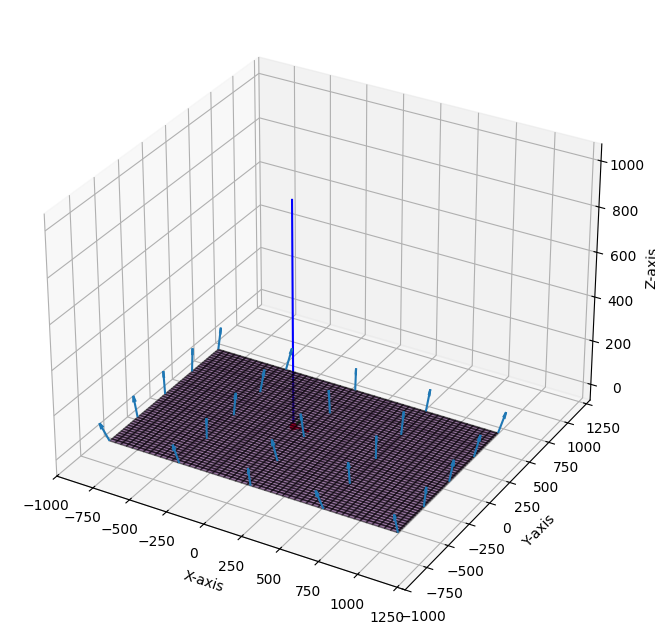

In [170]:
plot_rays_on_image()